In [1]:
import os
import sys

# Add src directory to system path
project_path = os.getcwd().split('/src')[0]
sys.path.append(project_path)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

# Define important paths
lcd_path  = os.path.join(project_path, 'lcd')
out_path  = os.path.join(project_path, 'out')
plt_path  = os.path.join(project_path, 'plt')

ModuleNotFoundError: No module named 'seaborn'

In [70]:
# Functions

def calc_angle_between(A, B):
    magA  = np.linalg.norm(A)
    magB  = np.linalg.norm(B)
    AdotB = np.dot(A,B)
    theta = np.arccos(AdotB/(magA*magB)) * (180/np.pi)
    return theta

def muon_flux(E, theta, A = 0.14, B = 0.054, g = 2.7, p = 115, k = 850, rc = 0):
    prefactor = A*(E**(-g))
    term1     = (1.1*E*np.cos(theta))/(p)
    term2     = (1.1*E*np.cos(theta))/(k)
    expression= prefactor * ( 1/(1+term1) + B/(1+term2) )
    return expression

In [2]:
# Load processed data

geo_matrix_path = os.path.join("/home/hargy/Science/Projects/googlemapspy", "geo_matrix.npy")
geo_matrix      = np.load(geo_matrix_path)
z               = geo_matrix

# Define parameters
SN_distance = 3048 # metres
WE_distance = 4920 # metres

# Generate distance values (taken from google earth)
SN_vals = np.linspace(-int(SN_distance/2), int(SN_distance/2), len(z[0]))
WE_vals = np.linspace(-int(WE_distance/2), int(WE_distance/2), len(z[0]))

# Create the grid and interpolate
x, y = np.meshgrid(SN_vals, WE_vals)

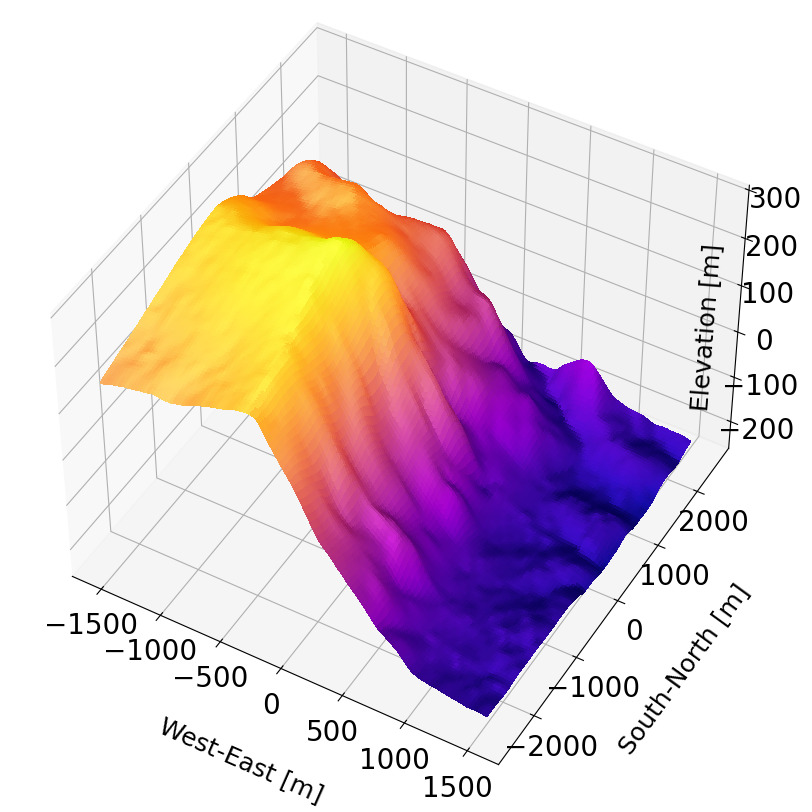

In [3]:
# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

fontsize = 18

ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_xlabel("West-East [m]", fontsize=fontsize, labelpad = 25)  
ax.set_ylabel("South-North [m]", fontsize=fontsize, labelpad = 25)  
ax.set_zlabel("Elevation [m]", fontsize=fontsize, labelpad = -35)  

ls = LightSource(5, 5)
rgb = ls.shade(z, cmap=cm.plasma, vert_exag=1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=2, antialiased=False, shade=False)

# Adjust view angle
ax.view_init(elev=45, azim=300)

fig.tight_layout()

plt.show()
plt.close()

In [67]:
# Measurement site
zero = np.array([0,0,-274])

# Define Northern Vector
vec_north = np.array([0, 100, -274]) - zero

# Instantiate empty magnitudes matrix
mags   = np.empty((119,119))

thetas = np.empty((119,119))

phis   = np.empty((119,119)) 

for i in range(119):
    for j in range(119):
        # Random surface point
        x_idx, y_idx = i, j
        x1 = SN_vals[x_idx]
        y1 = WE_vals[y_idx]
        z1     = z[x_idx][y_idx]
        surface_point = np.array([x1, y1, z1])
        
        # Direction vector to point
        vec_dir = surface_point - zero

        # Calculate vector magnitude (the slant depth)
        mag = np.linalg.norm(vec_dir)

        # Project vector to surface plane of the measurement point (zero)
        # by setting the z-component to zero
        vec_dir_proj = np.array([vec_dir[0], vec_dir[1], 0])

        # Calculate theta
        theta = 90 - calc_angle_between(vec_dir, vec_dir_proj)

        # Calculate phi
        phi   = calc_angle_between(vec_north, vec_dir_proj)

        # Add to matrix
        mags[x_idx, y_idx] = mag
        thetas[x_idx, y_idx] = theta
        phis[x_idx, y_idx] = phi

/tmp/ipykernel_15734/3370257452.py:7: RuntimeWarning: invalid value encountered in scalar divide
  theta = np.arccos(AdotB/(magA*magB)) * (180/np.pi)


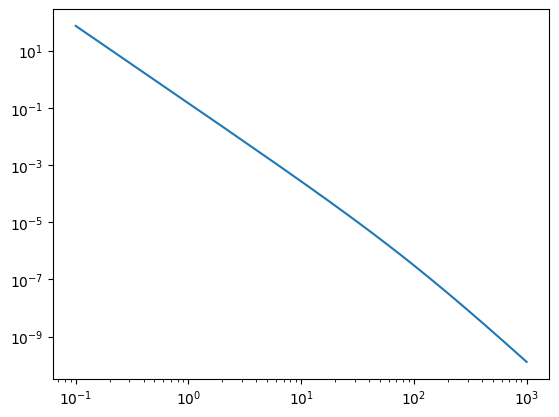

In [75]:
theta = 0
e_vals = np.linspace(0.1,1000, 1000)
dnde   = muon_flux(e_vals, theta)

plt.plot(e_vals, dnde)
plt.xscale("log")
plt.yscale("log")